In [75]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [76]:
dataset = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=["label", "message"])

In [77]:
lemmatizer = WordNetLemmatizer()
corpus = []

In [78]:
for i in range(len(dataset)):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset['message'][i]).lower().split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [79]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [80]:
y = pd.get_dummies(dataset['label'])
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [81]:
y = y.iloc[:,1].values

In [82]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [84]:
model = MultinomialNB().fit(X_train, y_train)

In [85]:
y_pred = model.predict(X_test)

In [86]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [87]:
cm = confusion_matrix(y_test,y_pred)

In [88]:
cm

array([[936,  19],
       [  7, 153]], dtype=int64)

In [89]:
accuracy = accuracy_score(y_test,y_pred)

In [90]:
accuracy

0.9766816143497757

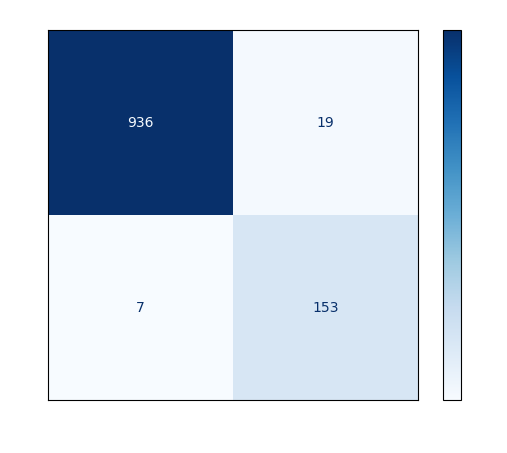

In [93]:
color = 'white'
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()